



### Problem Statement

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)
So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.

### Features

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Price: The price of the ticket

### Importing the libraries

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### Loading the Dataset

In [150]:
#Loading the training data set
df=pd.read_csv('flight_data.csv')
df.head()

Unnamed: 0 Airline_Name     Source Destination Departure_time  \
0           0     Go First  New Delhi      Mumbai          06:00   
1           1     Go First  New Delhi      Mumbai          05:25   
2           2     SpiceJet  New Delhi      Mumbai          06:35   
3           3     Air Asia  New Delhi      Mumbai          20:00   
4           4     Air Asia  New Delhi      Mumbai          09:35   

     Arrival_time Date of Journey Number of stops Duration  Price  
0           10:40     Thu, 25 Nov          1 Stop   4h 40m   4941  
1           14:05     Thu, 25 Nov          1 Stop   8h 40m   4941  
2           10:15     Thu, 25 Nov          1 Stop   3h 40m   5949  
3  02:25\n+ 1 day     Thu, 25 Nov          1 Stop   6h 25m   5953  
4           20:35     Thu, 25 Nov          1 Stop  11h 00m   5953

In [151]:
#Printing the last five records
df.tail()

Unnamed: 0 Airline_Name     Source Destination Departure_time  \
1524        1524      Vistara  New Delhi      Mumbai          20:40   
1525        1525       IndiGo  New Delhi      Mumbai          12:55   
1526        1526       IndiGo  New Delhi      Mumbai          10:15   
1527        1527       IndiGo  New Delhi      Mumbai          12:55   
1528        1528     Go First  New Delhi      Mumbai          10:45   

        Arrival_time Date of Journey Number of stops Duration  Price  
1524  10:15\n+ 1 day     Fri, 10 Dec          1 Stop  13h 35m  11434  
1525           18:50     Fri, 10 Dec          1 Stop   5h 55m  11573  
1526           18:05     Fri, 10 Dec          1 Stop   7h 50m  11573  
1527           20:45     Fri, 10 Dec          1 Stop   7h 50m  11888  
1528           18:20     Fri, 10 Dec          1 Stop   7h 35m  15405

In [152]:
df.shape

(1529, 10)

We can see that the dataset has 1529 rows and 10 columns

In [153]:
df.size

15290

Dataset has 15290 number of elements

In [154]:
#Checking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 10 columns):
Unnamed: 0         1529 non-null int64
Airline_Name       1529 non-null object
Source             1529 non-null object
Destination        1529 non-null object
Departure_time     1529 non-null object
Arrival_time       1529 non-null object
Date of Journey    1529 non-null object
Number of stops    1529 non-null object
Duration           1529 non-null object
Price              1529 non-null int64
dtypes: int64(2), object(8)
memory usage: 119.5+ KB


In [155]:
df.dtypes

Unnamed: 0          int64
Airline_Name       object
Source             object
Destination        object
Departure_time     object
Arrival_time       object
Date of Journey    object
Number of stops    object
Duration           object
Price               int64
dtype: object

Dataset has all the variables in categorical but we want to predict flight price is of numeric datatype.

### Data Cleaning

In [156]:
#Dropping the unecessary column Unamed
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [157]:
df

Airline_Name     Source Destination Departure_time    Arrival_time  \
0        Go First  New Delhi      Mumbai          06:00           10:40   
1        Go First  New Delhi      Mumbai          05:25           14:05   
2        SpiceJet  New Delhi      Mumbai          06:35           10:15   
3        Air Asia  New Delhi      Mumbai          20:00  02:25\n+ 1 day   
4        Air Asia  New Delhi      Mumbai          09:35           20:35   
5        Air Asia  New Delhi      Mumbai          20:00  07:40\n+ 1 day   
6        Air Asia  New Delhi      Mumbai          18:35  06:45\n+ 1 day   
7        Air Asia  New Delhi      Mumbai          08:00           20:35   
8        Air Asia  New Delhi      Mumbai          18:35  07:15\n+ 1 day   
9        Air Asia  New Delhi      Mumbai          12:40  02:25\n+ 1 day   
10       Air Asia  New Delhi      Mumbai          12:10  02:25\n+ 1 day   
11       Air Asia  New Delhi      Mumbai          22:10  12:25\n+ 1 day   
12       Go First  New Delhi      Mumbai          07:00           09:10   
13       Go First  New Delhi      Mumbai          07:40           09:50   
14       Go First  New Delhi      Mumbai          18:05           20:15   
15       Go First  New Delhi      Mumbai          02:00           04:15   
16       Go First  New Delhi      Mumbai          10:55           13:15   
17      Air India  New Delhi      Mumbai          07:00           09:05   
18        Vistara  New Delhi      Mumbai          09:30           11:35   
19         IndiGo  New Delhi      Mumbai          06:30           08:40   
20         IndiGo  New Delhi      Mumbai          07:15           09:25   
21      Air India  New Delhi      Mumbai          08:00           10:10   
22         IndiGo  New Delhi      Mumbai          08:10           10:20   
23      Air India  New Delhi      Mumbai          10:40           12:50   
24         IndiGo  New Delhi      Mumbai          12:00           14:10   
25        Vistara  New Delhi      Mumbai          12:50           15:00   
26        Vistara  New Delhi      Mumbai          14:20           16:30   
27        Vistara  New Delhi      Mumbai          15:30           17:40   
28        Vistara  New Delhi      Mumbai          16:55           19:05   
29         IndiGo  New Delhi      Mumbai          17:15           19:25   
...           ...        ...         ...            ...             ...   
1499      Vistara  New Delhi      Mumbai          17:35           23:25   
1500      Vistara  New Delhi      Mumbai          17:35  08:15\n+ 1 day   
1501      Vistara  New Delhi      Mumbai          10:00           23:00   
1502       IndiGo  New Delhi      Mumbai          18:00           22:25   
1503      Vistara  New Delhi      Mumbai          06:30           13:00   
1504      Vistara  New Delhi      Mumbai          06:30           20:20   
1505    Air India  New Delhi      Mumbai          13:15           17:50   
1506      Vistara  New Delhi      Mumbai          10:55           16:00   
1507      Vistara  New Delhi      Mumbai          18:40  01:35\n+ 1 day   
1508    Air India  New Delhi      Mumbai          09:45           21:05   
1509    Air India  New Delhi      Mumbai          06:05           15:50   
1510      Vistara  New Delhi      Mumbai          17:40           23:00   
1511      Vistara  New Delhi      Mumbai          14:45           23:00   
1512       IndiGo  New Delhi      Mumbai          05:50           16:05   
1513      Vistara  New Delhi      Mumbai          09:05           20:15   
1514      Vistara  New Delhi      Mumbai          05:55           20:15   
1515      Vistara  New Delhi      Mumbai          20:35  10:00\n+ 1 day   
1516       IndiGo  New Delhi      Mumbai          05:30           10:55   
1517      Vistara  New Delhi      Mumbai          14:15           20:15   
1518      Vistara  New Delhi      Mumbai          08:05           20:15   
1519      Vistara  New Delhi      Mumbai          07:30           14:30   
1520      Vistara  New Delhi  

### Checking for missing values

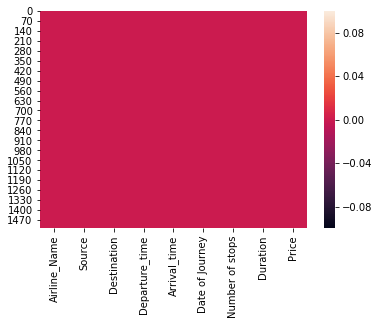

In [158]:
sn.heatmap(df.isnull())

In [159]:
df.isnull().sum()

Airline_Name       0
Source             0
Destination        0
Departure_time     0
Arrival_time       0
Date of Journey    0
Number of stops    0
Duration           0
Price              0
dtype: int64

The above both graph is here to show that if there are any null values in the above dataset. In order to get clearity we have taken out the sum of the total null values down which is giving us the same output that is 0.

In [160]:
#Shows all the columns
df.columns

Index(['Airline_Name', 'Source', 'Destination', 'Departure_time',
       'Arrival_time', 'Date of Journey', 'Number of stops', 'Duration',
       'Price'],
      dtype='object')

In [161]:
#Checking for unique values present in each column
df.nunique()

Airline_Name         6
Source               1
Destination          1
Departure_time     134
Arrival_time       160
Date of Journey     15
Number of stops      4
Duration           164
Price              349
dtype: int64

In [162]:
#Gives statistical summary of data
df.describe()

Price
count   1529.000000
mean    8664.035317
std     3611.744765
min     4650.000000
25%     5953.000000
50%     7110.000000
75%    11468.000000
max    24815.000000

The above plot shows that the count of all column is equal to 1529 ,average price of ticket is 8664.03 and the minimum flight price is 4650 and maximum is 24815.

### Feature Engineering

In [163]:
df.keys()

Index(['Airline_Name', 'Source', 'Destination', 'Departure_time',
       'Arrival_time', 'Date of Journey', 'Number of stops', 'Duration',
       'Price'],
      dtype='object')

In [164]:
df['Date of Journey'].head()

0    Thu, 25 Nov
1    Thu, 25 Nov
2    Thu, 25 Nov
3    Thu, 25 Nov
4    Thu, 25 Nov
Name: Date of Journey, dtype: object

In [165]:
date=list(df['Date of Journey'])

In [166]:
# Day
sep = ','
Day=[]
for i in date:
    stripped = i.split(sep, 1)[0]
    Day.append(stripped)
    

In [167]:
#Month
sep=' '
Month=[]
for i in date:
    stripped=i.split(sep,2)[2]
    Month.append(stripped)

In [168]:
#Date
sep=' '
Date=[]
for i in date:
    stripped=i.split(sep,2)[1]
    Date.append(stripped)

In [169]:
df['Day']=Day
df['Month']=Month
df['Date']=Date

In [170]:
# Extracting hour and minutes from Dep_Time

df['Departure_Hour'] = pd.DatetimeIndex(df['Departure_time']).hour

In [171]:
df['Departure_Minute'] = pd.DatetimeIndex(df['Departure_time']).minute

In [172]:
#Removing exrta string in Arrival time
sep='\n'
Arrival_Time=[]
for i in df['Arrival_time']:
    stripped=i.split(sep,1)[0]
    Arrival_Time.append(stripped)

In [173]:
df['Arrival_time']=Arrival_Time # Replacing with the Arrival_time column

In [174]:
#Similar to Dep Time ,extracting hour and minutes from Arrival_Time
df['Arrival_Hour'] = pd.DatetimeIndex(df['Arrival_time']).hour
df['Arrival_Minute'] = pd.DatetimeIndex(df['Arrival_time']).minute

In [175]:
#Extracting total duration in seconds
import re
def convert_into_seconds(X):
    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', X)]
    if len(a) == 2:
        hr = a[0] * 3600
        min = a[1] * 60
    else:
        hr = a[0] * 3600
        min = 0   
    total = hr + min
    return total

df['Duration(sec)'] = df['Duration'].map(convert_into_seconds)

In [176]:
Departure_time=[]
for i in df['Departure_Hour']: # Scanning through all the values in Departure Hour
    if (i>=0 and i<6):
        Departure_time.append('Midnight')
    elif (i>=6 and i<12):
         Departure_time.append('Morning')
    elif (i>=12 and i<18):
         Departure_time.append('Afternoon')
    elif (i>=18 and i<24):
        Departure_time.append('Night')

In [177]:
# Storing list in dataframe for visualization purpose
Dep_time = pd.DataFrame(Departure_time)

In [178]:
Arrival_time=[]
for i in df['Arrival_Hour']: # Scanning through all the values in Arrival Hour
    if (i>=0 and i<6):
        Arrival_time.append('Midnight')
    elif (i>=6 and i<12):
         Arrival_time.append('Morning')
    elif (i>=12 and i<18):
         Arrival_time.append('Afternoon')
    elif (i>=18 and i<24):
        Arrival_time.append('Night')

In [179]:
# Storing list in dataframe for visualization purpose
Arrival_Time = pd.DataFrame(Arrival_time)

In [180]:
df.head()

Airline_Name     Source Destination Departure_time Arrival_time  \
0     Go First  New Delhi      Mumbai          06:00        10:40   
1     Go First  New Delhi      Mumbai          05:25        14:05   
2     SpiceJet  New Delhi      Mumbai          06:35        10:15   
3     Air Asia  New Delhi      Mumbai          20:00        02:25   
4     Air Asia  New Delhi      Mumbai          09:35        20:35   

  Date of Journey Number of stops Duration  Price  Day Month Date  \
0     Thu, 25 Nov          1 Stop   4h 40m   4941  Thu   Nov   25   
1     Thu, 25 Nov          1 Stop   8h 40m   4941  Thu   Nov   25   
2     Thu, 25 Nov          1 Stop   3h 40m   5949  Thu   Nov   25   
3     Thu, 25 Nov          1 Stop   6h 25m   5953  Thu   Nov   25   
4     Thu, 25 Nov          1 Stop  11h 00m   5953  Thu   Nov   25   

   Departure_Hour  Departure_Minute  Arrival_Hour  Arrival_Minute  \
0               6                 0            10              40   
1               5                25            14               5   
2               6                35            10              15   
3              20                 0             2              25   
4               9                35            20              35   

   Duration(sec)  
0          16800  
1          31200  
2          13200  
3          23100  
4          39600

### Exploratory Data Analysis

In [181]:
df['Airline_Name'].unique()

array(['Go First', 'SpiceJet', 'Air Asia', 'Air India', 'Vistara',
       'IndiGo'], dtype=object)

In [182]:
df['Airline_Name'].value_counts()

Vistara      455
IndiGo       341
Go First     277
Air India    220
Air Asia     145
SpiceJet      91
Name: Airline_Name, dtype: int64

In [183]:
plt.figure(figsize = (8, 6))
sn.countplot(df['Airline_Name'])
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation =90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

Vistara has highest number of flights followed by IndiGo and Go First whereas SpiceJet has least flights.

In [184]:
df['Month'].value_counts()

Dec    866
Nov    663
Name: Month, dtype: int64

In [185]:
# Month wise flight distribution
sn.countplot(df['Month'])
plt.xlabel('Month')
plt.ylabel('Count of flights')

Text(0, 0.5, 'Count of flights')

More number of flights in december month.

In [186]:
df['Day'].value_counts()

Thu    492
Fri    356
Sat    214
Wed    206
Sun    186
Tue     50
Mon     25
Name: Day, dtype: int64

Text(0, 0.5, 'Count of flights')

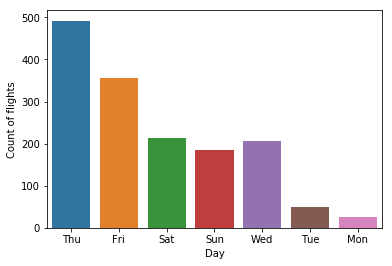

In [187]:
sn.countplot(df['Day'])
plt.xlabel('Day')
plt.ylabel('Count of flights')

We can see that the Thursday day has highest number of flight available and Monday has least number of flights available.

In [188]:
df['Date'].value_counts()

1     181
2     169
10    168
9     168
26    163
28    161
27    159
25    155
4      55
5      25
3      25
7      25
30     25
8      25
6      25
Name: Date, dtype: int64

Text(0, 0.5, 'Count of flights')

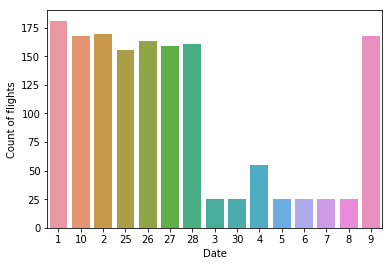

In [189]:
sn.countplot(df['Date'])
plt.xlabel('Date')
plt.ylabel('Count of flights')

In [190]:
df['Source'].value_counts()

New Delhi    1529
Name: Source, dtype: int64

In [191]:
df['Destination'].value_counts()

Mumbai    1529
Name: Destination, dtype: int64

The above data collected is only for route Delhi to Mumbai. 

In [192]:
df['Number of stops'].unique()

array(['1 Stop', 'Non Stop', '2 Stop(s)', '3 Stop(s)'], dtype=object)

In [193]:
df['Number of stops'].value_counts()

1 Stop       1032
Non Stop      466
2 Stop(s)      29
3 Stop(s)       2
Name: Number of stops, dtype: int64

Text(0, 0.5, 'Count of flights')

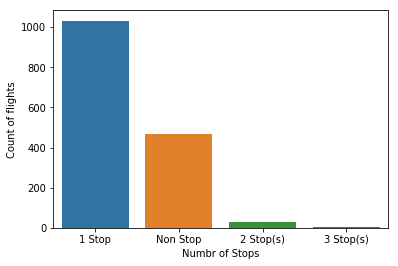

In [194]:
#Number of stops
sn.countplot(df['Number of stops'])
plt.xlabel('Numbr of Stops')
plt.ylabel('Count of flights')

There are more number of flights which have one stop and there are least number of flight which have 2 stops and 3 stops.

In [195]:
Dep_time[0].value_counts()

Morning      582
Night        426
Afternoon    386
Midnight     135
Name: 0, dtype: int64

Text(0, 0.5, 'Count of flights')

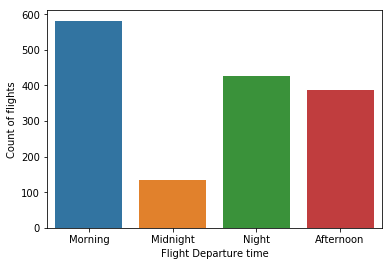

In [196]:
sn.countplot(Dep_time[0])
plt.xlabel('Flight Departure time')
plt.ylabel('Count of flights')

We can see that the least number of flight are in Midnight and Highest in Mornings.

In [197]:
Arrival_Time[0].value_counts()

Night        606
Afternoon    403
Morning      398
Midnight     122
Name: 0, dtype: int64

In [198]:
sn.countplot(Arrival_Time[0])
plt.xlabel('Flight Arrival time')
plt.ylabel('Count of flights')

Text(0, 0.5, 'Count of flights')

Most number of flights are arrived at Night time.

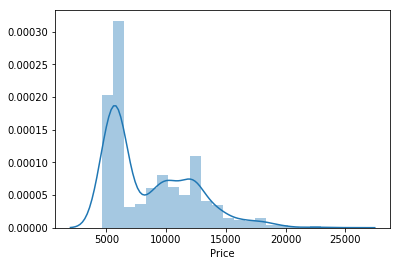

In [199]:
#Plotting the distribution plot for price
sn.distplot(df['Price'])

We can see that distribution plot is right skewed.

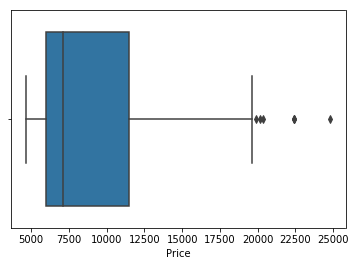

In [200]:
sn.boxplot(df['Price'])

Outliers are present in the dataset, but as we know that it is the price of the flights which changes on the realtime, thus we will not remove the outliers here.

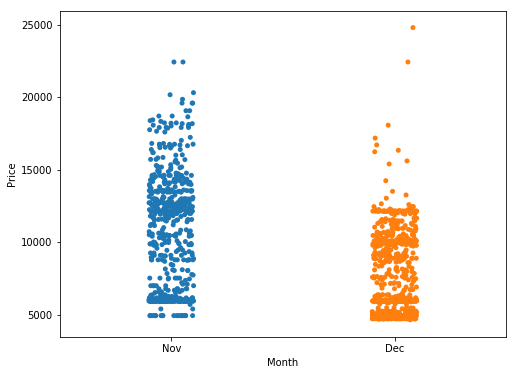

In [201]:
plt.figure(figsize=(8,6))
sn.stripplot(x='Month',y='Price',data=df)

December month has highest flight price.

In [202]:
plt.figure(figsize=(12,6))
sn.stripplot(data=df,x='Airline_Name',y='Price', palette='Set1')
plt.title('Airlines vs Price', size=14)
plt.xticks(rotation=90)
plt.show()

Air India and Go first shows the highest price of flight.

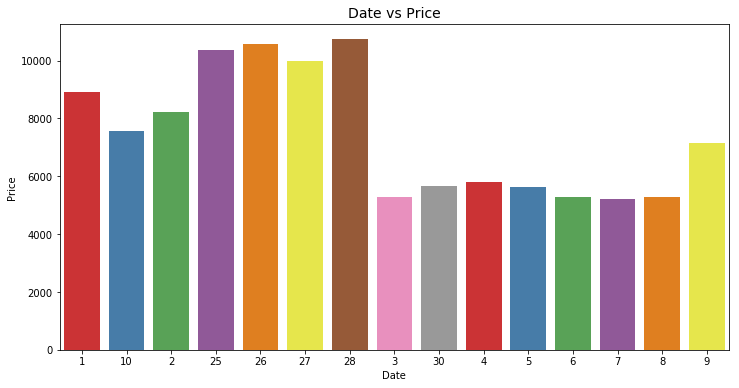

In [203]:
plt.figure(figsize=(12,6))
sn.barplot(x='Date', y='Price', data=df,palette='Set1',ci=None)
plt.title('Date vs Price', size=14)
plt.show()

In [204]:
plt.figure(figsize=(12,6))
sn.barplot(x='Day', y='Price', data=df,palette='Set1',ci=None)
plt.title('Day vs Price', size=14)
plt.show()

we can see that on weekend's prices are expensive than weekday's.

Text(0, 0.5, 'Price of ticket')

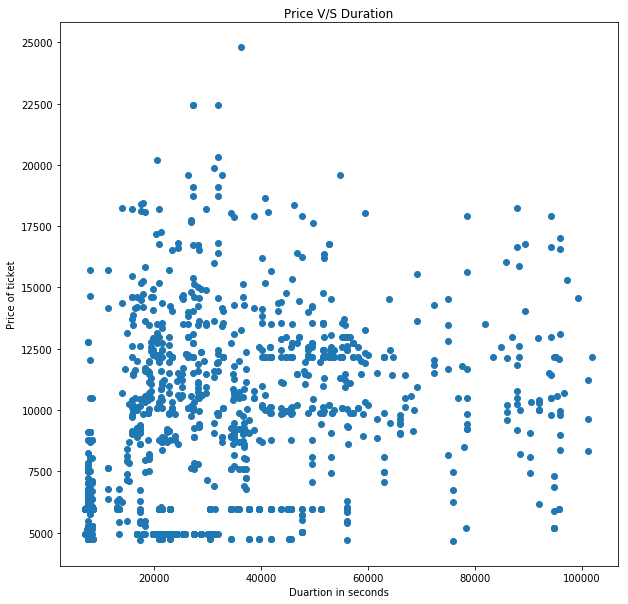

In [205]:
plt.figure(figsize = (10, 10))
plt.title('Price V/S Duration')
plt.scatter(df['Duration(sec)'], df['Price'])
plt.xlabel('Duartion in seconds')
plt.ylabel('Price of ticket')

The above graph shows that relationship between price of the flight tiket and duration of the flight. we could see that how the price changes as there is any change in the duration of the flight.

In [206]:
plt.figure(figsize=(12,6))
sn.barplot(df['Number of stops'], df['Price'], palette='Set3')
plt.title('Stops vs Price', size=14)
plt.show()

One thing can be notice here is that, whichever flight has number of stops equal to one the price of flight is maximum for that and non stop flight has lowest price.

In [207]:
df.head(2)

Airline_Name     Source Destination Departure_time Arrival_time  \
0     Go First  New Delhi      Mumbai          06:00        10:40   
1     Go First  New Delhi      Mumbai          05:25        14:05   

  Date of Journey Number of stops Duration  Price  Day Month Date  \
0     Thu, 25 Nov          1 Stop   4h 40m   4941  Thu   Nov   25   
1     Thu, 25 Nov          1 Stop   8h 40m   4941  Thu   Nov   25   

   Departure_Hour  Departure_Minute  Arrival_Hour  Arrival_Minute  \
0               6                 0            10              40   
1               5                25            14               5   

   Duration(sec)  
0          16800  
1          31200

### Label Encoding

In [208]:
#Removing all the columns which are of no use in order to predict the price of the flights because new columns are created for same
df.drop(['Date of Journey', 'Departure_time', 'Arrival_time', 'Duration'], axis = 1, inplace = True)

In [209]:
# Using lable encoding 
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [210]:
df.dtypes

Airline_Name        int32
Source              int32
Destination         int32
Number of stops     int32
Price               int64
Day                 int32
Month               int32
Date                int32
Departure_Hour      int64
Departure_Minute    int64
Arrival_Hour        int64
Arrival_Minute      int64
Duration(sec)       int64
dtype: object

### Checking for skewness 

In [211]:
df.skew()

Airline_Name       -0.126298
Source              0.000000
Destination         0.000000
Number of stops     0.819164
Price               0.903136
Day                -0.176313
Month               0.268168
Date                0.889838
Departure_Hour      0.064893
Departure_Minute    0.133329
Arrival_Hour       -0.438276
Arrival_Minute      0.184324
Duration(sec)       1.233449
dtype: float64

Normal Skewness range is -0.5 to 0.5 so some of the columns are out of range.

In [212]:
skewed_columns=["Number of stops","Price","Duration(sec)"]

In [222]:
# Using log transformation 
for col in df[skewed_columns]:
    df[col]=np.log1p(df[col])

In [223]:
df.skew()

Airline_Name       -0.126298
Source              0.000000
Destination         0.000000
Number of stops     0.795028
Price               0.363287
Day                -0.176313
Month               0.268168
Date                0.889838
Departure_Hour      0.064893
Departure_Minute    0.133329
Arrival_Hour       -0.438276
Arrival_Minute      0.184324
Duration(sec)       0.015966
dtype: float64

In [224]:
#Removing the unecessary columns
df.drop(['Source'],axis=1,inplace=True)
df.drop(['Destination'],axis=1,inplace=True)

#### Finding the correlation between independent and dependent features

In [225]:
#Finding the correlation values
cor=df.corr()
cor

Airline_Name  Number of stops     Price       Day     Month  \
Airline_Name          1.000000         0.045076  0.304915 -0.032910  0.092613   
Number of stops       0.045076         1.000000 -0.495745 -0.025612 -0.006459   
Price                 0.304915        -0.495745  1.000000 -0.037041  0.374519   
Day                  -0.032910        -0.025612 -0.037041  1.000000 -0.258721   
Month                 0.092613        -0.006459  0.374519 -0.258721  1.000000   
Date                 -0.105983        -0.012284 -0.245637  0.069925 -0.086654   
Departure_Hour       -0.026527        -0.012875  0.035055  0.022095  0.006157   
Departure_Minute      0.223473         0.007501  0.089285 -0.002673  0.032786   
Arrival_Hour          0.263888        -0.036147  0.206160 -0.015487  0.019409   
Arrival_Minute       -0.023941        -0.043343  0.105989  0.011702  0.031516   
Duration(sec)         0.005818        -0.828828  0.511956  0.024425  0.041668   

                      Date  Departure_Hour  Departure_Minute  Arrival_Hour  \
Airline_Name     -0.105983       -0.026527          0.223473      0.263888   
Number of stops  -0.012284       -0.012875          0.007501     -0.036147   
Price            -0.245637        0.035055          0.089285      0.206160   
Day               0.069925        0.022095         -0.002673     -0.015487   
Month            -0.086654        0.006157          0.032786      0.019409   
Date              1.000000       -0.001595         -0.043274     -0.060938   
Departure_Hour   -0.001595        1.000000         -0.035852     -0.012681   
Departure_Minute -0.043274       -0.035852          1.000000      0.072141   
Arrival_Hour     -0.060938       -0.012681          0.072141      1.000000   
Arrival_Minute   -0.024225        0.054790         -0.118584     -0.036610   
Duration(sec)    -0.012185        0.058195          0.020373     -0.009931   

                  Arrival_Minute  Duration(sec)  
Airline_Name           -0.023941       0.005818  
Number of stops        -0.043343      -0.828828  
Price                   0.105989       0.511956  
Day                     0.011702       0.024425  
Month                   0.031516       0.041668  
Date                   -0.024225      -0.012185  
Departure_Hour          0.054790       0.058195  
Departure_Minute       -0.118584       0.020373  
Arrival_Hour           -0.036610      -0.009931  
Arrival_Minute          1.000000       0.024459  
Duration(sec)           0.024459       1.000000

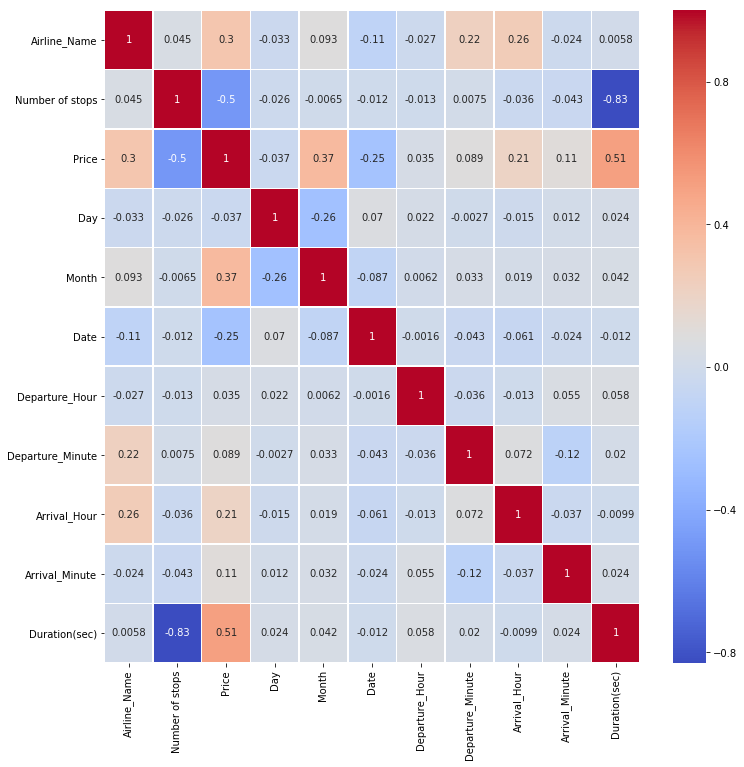

In [226]:
#Plotting heatmap
corr_matrix=df.corr()
fig, axis = plt.subplots(figsize=(12, 12))
sn.heatmap(corr_matrix,annot=True,linewidths=.5,cmap='coolwarm')

1. Number of Stop is having strong negative correlation with the Duration(Sec).
2. Price and Duration(sec) is having positive correlation with each other.

### Seperating data into independent and dependent variables.

In [227]:
x = df.drop('Price', axis = 1) #Set of input features 
y = df['Price']  #Target variable

In [228]:
print(x.shape)
x.head()

(1529, 10)


Airline_Name  Number of stops  Day  Month  Date  Departure_Hour  \
0             2              0.0    4      1     3               6   
1             2              0.0    4      1     3               5   
2             4              0.0    4      1     3               6   
3             0              0.0    4      1     3              20   
4             0              0.0    4      1     3               9   

   Departure_Minute  Arrival_Hour  Arrival_Minute  Duration(sec)  
0                 0            10              40       9.729194  
1                25            14               5      10.348205  
2                35            10              15       9.488048  
3                 0             2              25      10.047631  
4                35            20              35      10.586610

In [229]:
print(y.shape)
y.head()

(1529,)


0    8.505525
1    8.505525
2    8.691146
3    8.691819
4    8.691819
Name: Price, dtype: float64

### Using Standard Scaler

In [230]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best R2_score is",MaxAccu,'on random state',maxRS)

Best R2_score is 0.6189760666735094 on random state 42


### Creating train test split

In [232]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxRS)

### Applying Different models on the dataset

In [233]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
lr_score=r2_score(y_test,y_pred)
print("R2 score from Linear regression is",lr_score)
lr_cv=cross_val_score(regressor,x,y,scoring='r2',cv=5).mean()
lr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',lr_mae)
lr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',lr_mse)
print("Cross validation score is ",lr_cv)

R2 score from Linear regression is 0.6189760666735094
Mean absolute error :  0.18344110696470256
Mean Squared error : 0.057769222755463694
Cross validation score is  0.3630030516140986


In [234]:
# Support Vector Regression
from sklearn.svm import SVR
SR = SVR()
SR.fit(x, y)
y_pred=SR.predict(x_test)
svr_score=r2_score(y_test,y_pred)
print("R2 score from Support Vector regression is",svr_score)
svr_cv=cross_val_score(SR,x,y,scoring='r2',cv=5).mean()
svr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',svr_mae)
svr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',svr_mse)
print("Cross validation score is ",svr_cv)

R2 score from Support Vector regression is 0.829725979940019
Mean absolute error :  0.10779438092662297
Mean Squared error : 0.025816220278962333
Cross validation score is  0.339984428854994


In [235]:
# K nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(x, y)
y_pred=neigh.predict(x_test)
knn_score=r2_score(y_test,y_pred)
print("R2 score from K Nearest Neighbors regression is",knn_score)
knn_cv=cross_val_score(neigh,x,y,scoring='r2',cv=5).mean()
knn_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',knn_mae)
knn_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',knn_mse)
print("Cross validation score is ",knn_cv)

R2 score from K Nearest Neighbors regression is 0.8317013113205065
Mean absolute error :  0.10020490421526997
Mean Squared error : 0.025516728964758033
Cross validation score is  0.23121090180752457


In [237]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor()
RFR.fit(x_train, y_train)
y_pred=RFR.predict(x_test)
rfr_score=r2_score(y_test,y_pred)
print("R2 score from Random Forest regression is",rfr_score)
rfr_cv=cross_val_score(RFR,x,y,scoring='r2',cv=5).mean()
rfr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',rfr_mae)
rfr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',rfr_mse)
print("Cross validation score is ",rfr_cv)

R2 score from Random Forest regression is 0.8391925651119825
Mean absolute error :  0.09007096669650684
Mean Squared error : 0.024380937033738656
Cross validation score is  0.28490927991252313


In [238]:
model=['Linear Regression','Support Vector Regressor','K Neighbors Regressor','Random Forest Regressor']

acc=[svr_score*100,lr_score*100,knn_score*100,rfr_score*100]
mae=[svr_mae,lr_mae,knn_mae,rfr_mae]
mse=[svr_mse,lr_mse,knn_mse,rfr_mse]
cv_score=[svr_cv*100,lr_cv*100,knn_cv*100,rfr_cv*100]

result=pd.DataFrame({'Model':model,'R2_score':acc,'Mean Absolute Error':mae,'Mean Squared Error':mse,'Cross validation_score':cv_score})
result
# Creting dataframe to store R2_score,Mae and cv score of all the models.

Model   R2_score  Mean Absolute Error  \
0         Linear Regression  82.972598             0.107794   
1  Support Vector Regressor  61.897607             0.183441   
2     K Neighbors Regressor  83.170131             0.100205   
3   Random Forest Regressor  83.919257             0.090071   

   Mean Squared Error  Cross validation_score  
0            0.025816               33.998443  
1            0.057769               36.300305  
2            0.025517               23.121090  
3            0.024381               28.490928

### Choosing the model

Random forest Regressor model works well in comparision of all giving max r2_score of 83.91

### Appying hyperparameter to the best accuracy model

In [240]:
from sklearn.model_selection import GridSearchCV

In [241]:
parameters = { 
            "n_estimators"      : [10,50,100,200],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [242]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [243]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 50, 100, 200]})

In [244]:
GCV.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 100}

In [245]:
Final_Model=RandomForestRegressor(bootstrap=False,max_features='log2',min_samples_split=4,n_estimators=100)
Final_Model.fit(x_train,y_train)
y_pred=Final_Model.predict(x_test)
acc=r2_score(y_test,y_pred)
print("R2 Score of the model is ",acc*100)
knn_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',knn_mae)

R2 Score of the model is  84.22781932886927
Mean absolute error :  0.08871526642077589


### Conclusion

Here after trying with various model for the above dataset, I am going to choose Random forest regressor as the best model for pridicting the price of the flights.Randmon Forest Regressor performs best with hyperparameter tuning, where accuracy increased from 83.91 to 84.22%.

### Saving the model

In [246]:
import joblib
import sys
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.externals import joblib

In [247]:
joblib.dump(Final_Model,'Final_Model.pkl')

['Final_Model.pkl']